In [116]:
import pandas as pd
import numpy as np
from scipy.stats.stats import pearsonr
import matplotlib
import matplotlib.pyplot as plt
import datetime
import keras
import sklearn.linear_model as lm

Using TensorFlow backend.


In [2]:
train = pd.read_csv('Train.csv')

In [4]:
goal = 'target_2015'

In [3]:
train

,X,Y,target_2015,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,...,precip 2019-03-24 - 2019-03-31,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19,LC_Type1_mode,Square_ID
0,34.26,-15.91,0.000000,887.764222,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9,4e3c3896-14ce-11ea-bce5-f49634744a41
1,34.26,-15.90,0.000000,743.403912,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9,4e3c3897-14ce-11ea-bce5-f49634744a41
2,34.26,-15.89,0.000000,565.728343,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9,4e3c3898-14ce-11ea-bce5-f49634744a41
3,34.26,-15.88,0.000000,443.392774,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10,4e3c3899-14ce-11ea-bce5-f49634744a41
4,34.26,-15.87,0.000000,437.443428,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10,4e3c389a-14ce-11ea-bce5-f49634744a41
5,34.26,-15.86,0.000000,405.631747,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10,4e3c389b-14ce-11ea-bce5-f49634744a41
6,34.26,-15.85,0.000000,389.261362,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10,4e3c389c-14ce-11ea-bce5-f49634744a41
7,34.26,-15.84,0.000000,383.123454,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10,4e3c389d-14ce-11ea-bce5-f49634744a41
8,34.26,-15.83,0.000000,382.920492,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10,4e3c389e-14ce-11ea-bce5-f49634744a41
9,34.27,-15.92,0.000000,826.058090,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9,4e3c389f-14ce-11ea-bce5-f49634744a41


In [124]:
train.size

658640

In [114]:
sum(train['target_2015'] != 0) / train.size * 100

0.41980444552411034

In [109]:
%matplotlib qt
precip = train.drop(['X', 'Y', 'target_2015', 'elevation', 'LC_Type1_mode', 'Square_ID'], axis=1).iloc[60]
plt.plot([datetime.date(2014, 11, 16) + pd.Timedelta(days = i * 7) for i in range(precip.size)], precip.T)
plt.show()

In [8]:
np.cov(train[goal], train['elevation'])

array([[ 5.23190875e-02, -1.65961777e+01],
       [-1.65961777e+01,  1.25876198e+05]])

In [15]:
pearsonr(train[goal], train['elevation'])

(-0.2045060625493404, 5.555375279750311e-155)

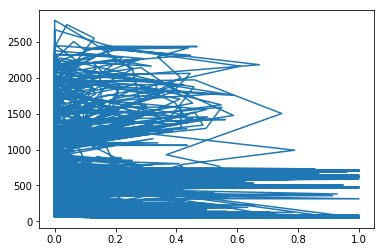

In [17]:
plt.plot(train[goal], train['elevation'])